In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [46]:
df=pd.read_csv('Mall_Customers.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
df.shape[0]

200

In [49]:
df.shape

(200, 5)

In [50]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [52]:
df.sample(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
182,183,Male,46,98,15
103,104,Male,26,62,55
160,161,Female,56,79,35
123,124,Male,39,69,91


In [53]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [54]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'}, inplace=True)


In [58]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

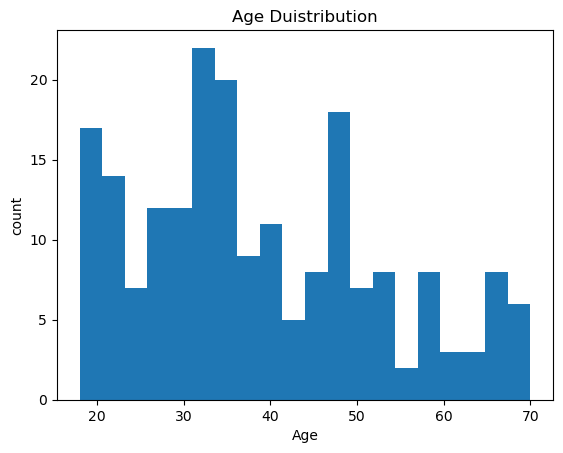

In [59]:
# Univariate Analysis
plt.figure()
plt.hist(df['Age'],bins=20)
plt.title('Age Duistribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

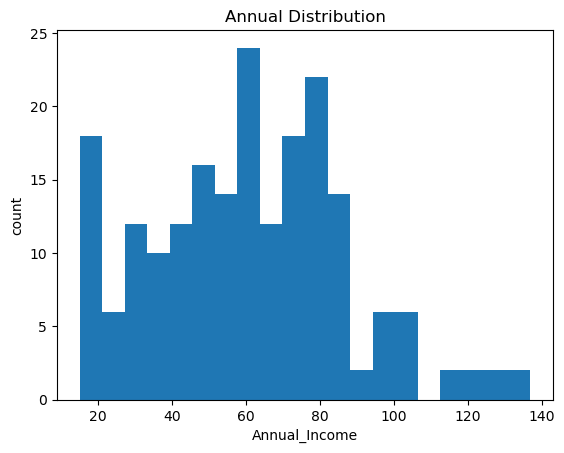

In [60]:
# Annual Income Distribution
plt.figure()
plt.hist(df['Annual_Income'],bins=20)
plt.title('Annual Distribution')
plt.xlabel('Annual_Income')
plt.ylabel('count')
plt.show()

In [61]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

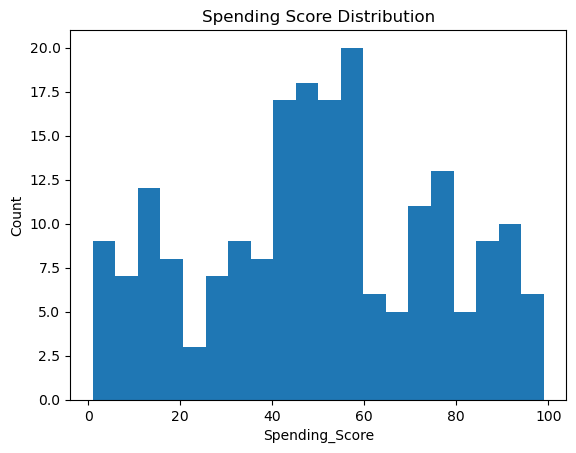

In [62]:
plt.figure()
plt.hist(df['Spending_Score'], bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending_Score')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Gender count')

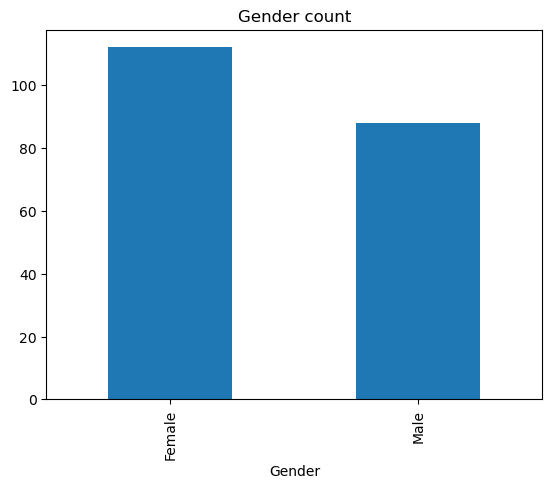

In [63]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender count')

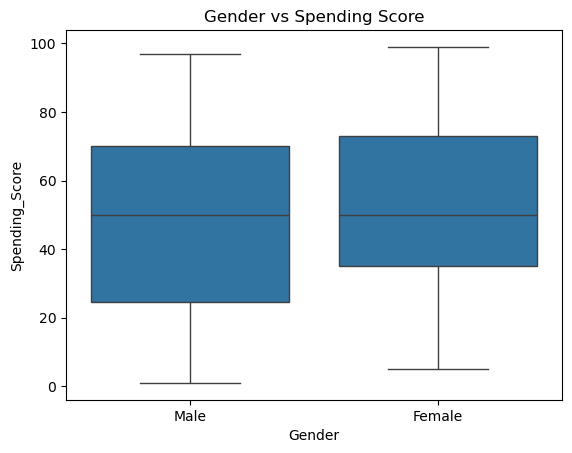

In [64]:
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender vs Spending Score')
plt.show()


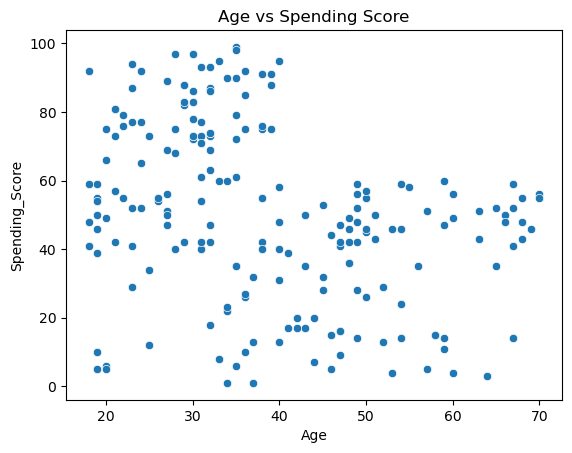

In [65]:
sns.scatterplot(x='Age', y='Spending_Score', data=df)
plt.title('Age vs Spending Score')
plt.show()


<Axes: ylabel='Annual_Income'>

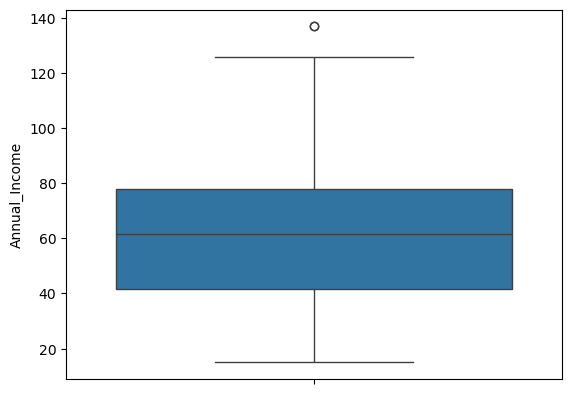

In [66]:
sns.boxplot(df['Annual_Income'])
# Only Annual_Income contains outliers, while all other columns show no significant outliers and the data is suitable for further analysis.

In [67]:
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Annual_Income'] < Q1 - 1.5*IQR) | 
              (df['Annual_Income'] > Q3 + 1.5*IQR)]

print("Number of outliers:", outliers.shape[0])


Number of outliers: 2


In [68]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

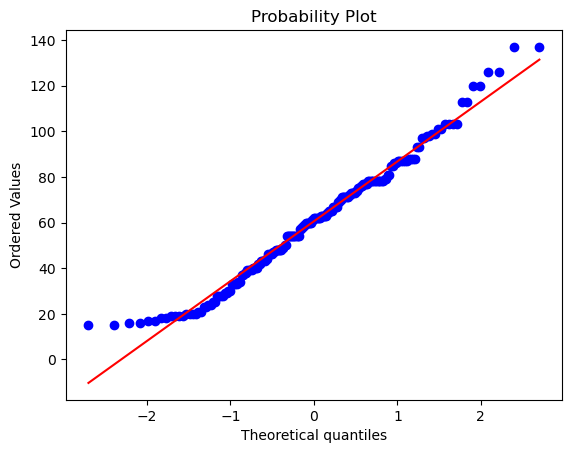

In [69]:
stats.probplot(df['Annual_Income'],dist='norm',plot=plt)
plt.show()

In [70]:
men=np.mean(df['Annual_Income'])
men

np.float64(60.56)

In [71]:
sd=np.std(df['Annual_Income'])
sd

26.19897707926782

In [72]:
# ks test apply 
median=df['Annual_Income']
mean=median.mean()
std=median.std()


In [73]:
from scipy.stats import kstest
Ks_test,p_value=kstest(median,'norm')

In [74]:
Ks_test,p_value

(np.float64(1.0), np.float64(0.0))

In [75]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

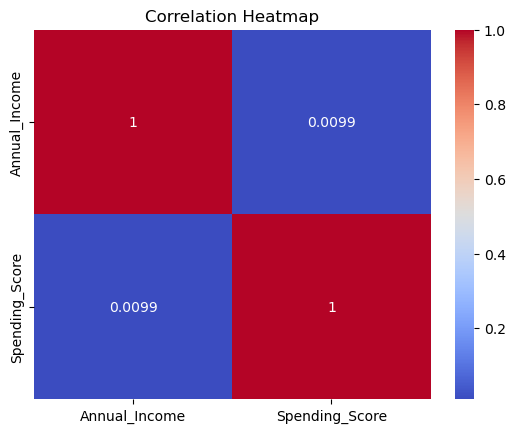

In [76]:

numeric_df = df[['Annual_Income','Spending_Score']]

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [77]:
from scipy.stats import ttest_ind

male = df[df['Gender']=='Male']['Spending_Score']
female = df[df['Gender']=='Female']['Spending_Score']

t_stat, p_value = ttest_ind(male, female)

print("T-stat:", t_stat)
print("P-value:", p_value)


T-stat: -0.8190464150660334
P-value: 0.4137446589852174


In [78]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [79]:
X = df[['Annual_Income','Spending_Score']]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

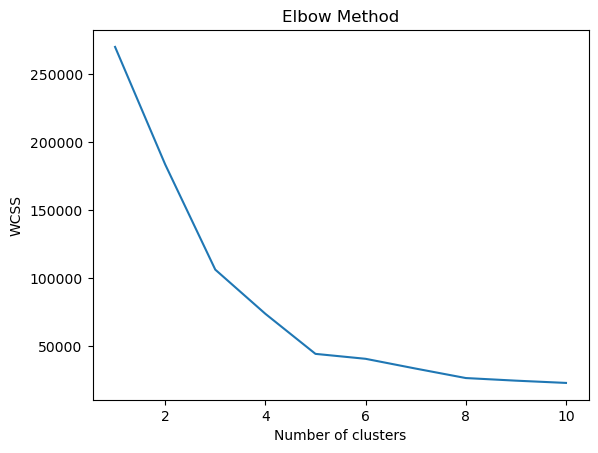

In [80]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [81]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


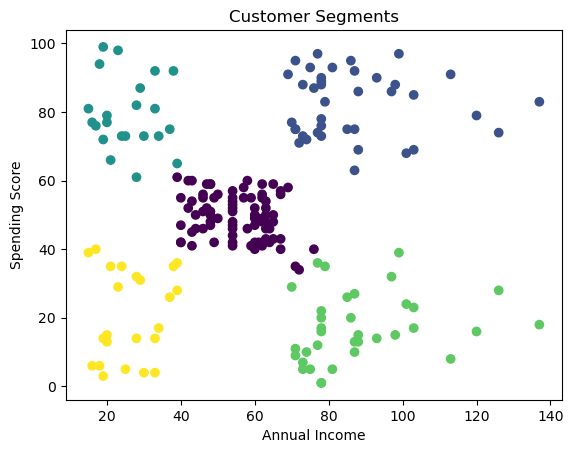

In [82]:
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()


In [ ]:
# Identify high-value customers

# Design targeted marketing strategies

# Improve customer retention

# Increase revenue through personalized campaigns

# KMeans clustering provides meaningful business insights by grouping customers with similar purchasing behavior.